Wiki crawled at night of 10/june/2019

In [ ]:
!pip install sentencepiece
!pip install tf_sentencepiece

In [ ]:
!pip install fastai==1.0.52
from fastai import *
from fastai.text import *

import re
import sentencepiece as spm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
wiki=path/'Thesis Data'/'wiki_data'/'Wiki'

### Set Data(no rerun)

In [0]:
df = pd.read_csv(wiki/'wiki.csv')

In [0]:
len(df)

70623

In [0]:
df.head()

,id,text,title,url
0,2341,বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি। এরা টাঙ...,বংশী,https://bn.wikipedia.org/wiki?curid=2341
1,107282,আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় আবহ...,আবহাওয়াবিদ্যা,https://bn.wikipedia.org/wiki?curid=107282
2,107838,কোরিয়ার ওয়ার্কার্স পার্টি হল গণতান্ত্রিক গণপ...,কোরিয়ার ওয়ার্কার্স পার্টি,https://bn.wikipedia.org/wiki?curid=107838
3,4542,মোহাম্মদ মোস্তফা কামাল (১৬ ডিসেম্বর ১৯৪৭ - এপ্...,মোস্তফা কামাল (বীরশ্রেষ্ঠ),https://bn.wikipedia.org/wiki?curid=4542
4,4626,মণিপুরী সংস্কৃতির উজ্জ্বলতম দিক হলো মণিপুরী নৃ...,মণিপুরী (নৃত্য),https://bn.wikipedia.org/wiki?curid=4626


In [0]:
df['label']=0
df = df[['label','text']]

In [0]:
df.head()

,label,text
0,0,বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি। এরা টাঙ...
1,0,আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় আবহ...
2,0,কোরিয়ার ওয়ার্কার্স পার্টি হল গণতান্ত্রিক গণপ...
3,0,মোহাম্মদ মোস্তফা কামাল (১৬ ডিসেম্বর ১৯৪৭ - এপ্...
4,0,মণিপুরী সংস্কৃতির উজ্জ্বলতম দিক হলো মণিপুরী নৃ...


In [0]:
print(df.iloc[:1]['text'][0])

বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি। এরা টাঙ্গাইল জেলার "মহানান্দপুর" এবং "দন্দোনিয়া" নামে পাশাপাশি দুইটি গ্রামের বসবাস করে। তারা নিজেদেরকে "সূর্য-বংশী" বলে থাকে।



In [0]:
df.to_csv(wiki/'wiki_lm.csv',index=False)

In [0]:
df = pd.read_csv(wiki/'wiki_lm.csv')
df.head()

,label,text
0,0,বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি। এরা টাঙ...
1,0,আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় আবহ...
2,0,কোরিয়ার ওয়ার্কার্স পার্টি হল গণতান্ত্রিক গণপ...
3,0,মোহাম্মদ মোস্তফা কামাল (১৬ ডিসেম্বর ১৯৪৭ - এপ্...
4,0,মণিপুরী সংস্কৃতির উজ্জ্বলতম দিক হলো মণিপুরী নৃ...


In [0]:
df['text'].apply(lambda x: len(str(x).split())).sum() #total words

18229727

In [0]:
len(set(' '.join(str(y) for y in df['text'].values).split())) #unique words

1289249

#### Sentence separation (for sentence piece)

In [0]:
def sent(s):
  global ls
  s = str(s).split('।')
  s = [ss+'।' for ss in s]
  ls = ls + s

In [0]:
ls =[]
df['text'].apply(sent); # Quite long time!

In [0]:
len(ls)

1308076

In [0]:
ls[:5]

['বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি।',
 ' এরা টাঙ্গাইল জেলার "মহানান্দপুর" এবং "দন্দোনিয়া" নামে পাশাপাশি দুইটি গ্রামের বসবাস করে।',
 ' তারা নিজেদেরকে "সূর্য-বংশী" বলে থাকে।',
 '\n।',
 'আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় আবহাওয়া সম্পর্কিত বিজ্ঞানকে আবহাওয়াবিদ্যা বলে।']

In [0]:
sv = pd.DataFrame({'text':ls})
sv.to_csv(wiki/'wiki_sents.csv',index=False)

In [0]:
sv = pd.read_csv(wiki/'wiki_sents.csv')
sv.head()

,text
0,বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি।
1,"এরা টাঙ্গাইল জেলার ""মহানান্দপুর"" এবং ""দন্দোনি..."
2,"তারা নিজেদেরকে ""সূর্য-বংশী"" বলে থাকে।"
3,\n।
4,আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় আবহ...


In [0]:
len(sv)

1308076

In [0]:
defaults.text_pre_rules

[<function fastai.text.transform.fix_html>,
 <function fastai.text.transform.replace_rep>,
 <function fastai.text.transform.replace_wrep>,
 <function fastai.text.transform.spec_add_spaces>,
 <function fastai.text.transform.rm_useless_spaces>]

In [0]:
for rule in defaults.text_pre_rules:
    sv['text']=sv['text'].apply(lambda x: rule(str(x)))

In [0]:
sv['text'] = sv['text'].apply(lambda x: '<s>'+x+'</s>');

In [0]:
sv.head(1)['text'][0]

'<s>বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি।</s>'

In [0]:
file = 'formatted_wiki_sents.csv'

In [0]:
## Saving the file
sv.to_csv(wiki/file,index=False)

In [0]:
sv = pd.read_csv(wiki/file)
sv.head()

,text
0,<s>বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি।</s>
1,"<s> এরা টাঙ্গাইল জেলার ""মহানান্দপুর"" এবং ""দন্দ..."
2,"<s> তারা নিজেদেরকে ""সূর্য-বংশী"" বলে থাকে।</s>"
3,<s> \n ।</s>
4,<s>আবহাওয়াবিদ্যা (বা আবহবিদ্যা) মানে এককথায় ...


In [0]:
df=pd.read_csv(wiki/'wiki_lm.csv')
print(len(df))
df=df.dropna()
print(len(df))

70623
70377


In [0]:
df.to_csv(wiki/'wiki_lm.csv',index=False)

### load and save to current dir(no rerun-for sp)

In [0]:
file = 'formatted_wiki_sents.csv'
sv = pd.read_csv(wiki/file);
sv.to_csv(file,index=False) # to save in current directory

## Training

In [0]:
vocab_size = 30000
model_prefix = 'sp_wiki'

In [0]:
spm.SentencePieceTrainer.Train(f'--input={file}'\
                               f' --model_prefix={model_prefix}'\
                               f' --vocab_size={vocab_size}')
#                               f'--unk_piece={UNK} --bos_piece={BOS} --eos_id=-1 --pad_piece={PAD}')

True

In [0]:
#Head of the Vocab file: Line nums indicate index of vocab
!head -n10 {model_prefix}.vocab | nl

     1	<unk>	0
     2	<s>	0
     3	</s>	0
     4	▁	-1.90557
     5	।	-3.15283
     6	"	-3.81331
     7	,	-3.96524
     8	▁"	-4.22165
     9	ের	-4.61577
    10	র	-4.77473


In [9]:
## load up the Processor
sp = spm.SentencePieceProcessor()
sp.load(f'{model_prefix}.model')

True

In [0]:
itos = [] #{}
with open(f'{model_prefix}.vocab','r') as f:
    for line_num,line in enumerate(f):
        itos.append(line.split("\t")[0])

In [11]:
len(itos)

30000

In [12]:
itos[:5], itos[-5:]

(['<unk>', '<s>', '</s>', '▁', '।'],
 ['এইচএসপিএ', '▁ইকরিমা', '▁উস্কানি', '▁বাদানুবাদ', '/'])

In [0]:
class SPTokenizer(BaseTokenizer):
    "Wrapper around a SentncePiece tokenizer to make it a `BaseTokenizer`."
    def __init__(self, model_prefix:str):
        self.tok = spm.SentencePieceProcessor()
        self.tok.load(f'{model_prefix}.model')

    def tokenizer(self, t:str) -> List[str]:
        return self.tok.EncodeAsPieces(t)
    
class CustomTokenizer():
    '''Wrapper for SentencePiece toeknizer to fit into Fast.ai V1'''
    def __init__(self,tok_func:Callable,model_prefix:str, pre_rules:ListRules=None):
        self.tok_func,self.model_prefix = tok_func,model_prefix
        self.pre_rules  = ifnone(pre_rules,  defaults.text_pre_rules )
        
    def __repr__(self) -> str:
        res = f'Tokenizer {self.tok_func.__name__} using `{self.model_prefix}` model with the following rules:\n'
        for rule in self.pre_rules: res += f' - {rule.__name__}\n'
        return res        

    def process_text(self, t:str,tok:BaseTokenizer) -> List[str]:
        "Processe one text `t` with tokenizer `tok`."
        for rule in self.pre_rules: t = rule(t)  
        toks = tok.tokenizer(t)
        #post rules?
        return toks 
    
    def _process_all_1(self,texts:Collection[str]) -> List[List[str]]:
        'Process a list of `texts` in one process'
        tok = self.tok_func(self.model_prefix)
        return [self.process_text(t,tok) for t in texts]
                                                                     
    def process_all(self, texts:Collection[str]) -> List[List[str]]: 
        "Process a list of `texts`."                                 
        return self._process_all_1(texts)

In [0]:
#setup Vocab object for use in LM
sp_vocab = Vocab(itos)

In [0]:
mycust_tok = CustomTokenizer(SPTokenizer,model_prefix)

In [0]:
bs = 32
bptt = 70

### Wiki LM (ULM)

In [0]:
data_lm = TextLMDataBunch.from_csv(wiki , 'wiki_lm.csv', bs=bs , bptt=bptt,tokenizer=mycust_tok, vocab=sp_vocab)
data_lm.save('wiki_subword.pkl')

In [0]:
data_lm = load_data(wiki, 'wiki_subword.pkl',bs=bs)

In [0]:
len(data_lm.train_dl.vocab.itos)

30000

In [0]:
data_lm.show_batch()

idx,text
0,"▁অভয়ারণ্য ের ▁দুরত্ব ▁এক ▁কিলোমিটার । ▁১৯৭৮ ▁সালে ▁এই ▁অভয়ারণ্য ে ▁চিত্রা ▁হরিণ ▁এবং ▁মায়া ▁হরিণ ▁ছাড়া ▁হয় । ▁১৯৮৮ ▁সালের ▁হিসাবে ▁সেখানে ▁২৭ টি ▁চিত্রা ▁হরিণ , ▁৮টি ▁মায়া ▁হরিণ ▁এবং ▁১টি ▁কৃষ্ণ সার ▁ছিলো । ▁xx bo s ▁আবদুর ▁রো উ ফ ▁সরকার ▁( জন্ম : ▁১৩ ▁ফেব্রুয়ারি ▁১৯৪৬ , ▁মৃত্যু : ▁২৪ ▁এপ্রিল ▁২০১১ ) ▁একজন ▁বাংলাদেশের ▁অন্যতম ▁শ্রেষ্ঠ ▁প্রচ্ছদ শিল্পী ▁ছিলেন । ▁পেশায় ▁তিনি ▁জাতীয় ▁গ্রন্থ"
1,▁জয় ▁করতে ▁সক্ষম ▁হন । ▁দামেস্ক ের ▁পতনের ▁সংবাদ ▁পাওয়ার ▁পর ▁হেরাক্লিয়াস ▁এম ে সা ▁থেকে ▁এন্টিওক ের ▁উদ্দেশ্যে ▁যাত্রা ▁করেন । ▁বার্ষিক ▁করে র ▁বিনিময়ে ▁নাগরিকদের ▁শান্তি তে ▁বসবাসের ▁সুযোগ ▁দেওয়া ▁হয় । ▁দূরে ▁চলে ▁যাওয়ার ▁জন্য ▁বাইজেন্টাইন ▁সেনাবাহিনীকে ▁দেওয়া ▁হয় ▁তিন ▁দিনের ▁সুযোগ । ▁এই ▁সময়সীমা ▁শেষ ▁হওয়ার ▁পর ▁খালিদ ের ▁নেতৃত্বে ▁দামেস্ক ের ▁১৯ ০ ▁মাইল ▁উত্তরে ▁বাইজেন্টাইনদের ▁সাথে ▁মার জ ▁আল ▁দিবা জের ▁যুদ্ধ ▁সংঘটিত ▁হয়
2,"▁সম্যক ▁বা ▁ চেতন গুরু ▁হিসেবে ▁অভিহিত ▁করেন , ▁হযরত ▁বাবা জান সহ ▁তাজ উদ্দিন ▁বাবা , ▁নারায়ণ ▁মহারাজ , ▁শির ডি র ▁সাঁ ই ▁বাবা ▁এবং ▁উপ া স্ নি ▁মহারাজ ▁উল্লেখযোগ্য । P ur dom ▁(19 64 ) ▁p . ▁27 0 ▁উপ া স্ নি ▁মহারাজ , ▁তার ▁ভাষ্য ▁মতে , ▁আ ধ্যা ত্ব িক ▁অনুভব কে ▁স্বাভাবিক ▁জীবনের ▁সাথে ▁একত্রিত ▁করার ▁ক্ষেত্রে ▁তাকে ▁সাহায্য ▁করেন ▁যা"
3,"▁ফরাসী ▁উদ্ভিদ বিদ ▁এবং ▁ভূ তত্ত্ববিদ ▁পি য়ের ▁বই ট ার্ড ের ▁' প্যারিস ▁অ্যা ভো ঁ ▁লে সো ম্ব ' ▁রচনা টিতে ▁কাহিনীর ▁মূল ▁চরিত্রের ▁প্রাগৈতিহাসিক ▁প্যারিস ▁নগর ▁ভ্রমণের ▁এক ▁সুন্দর ▁বর্ণনা ▁ফুটে ▁উঠেছে । ▁এ ▁ছাড়াও ▁চার্লস ▁ ডিকেন্স ের ▁' আ ▁ক্রিসমাস ▁ক্যারল ' , ' নিউ ▁ মান্ থলি ▁ম্যাগাজিন ' ▁এ ▁প্রকাশিত ▁স্বনামধন্য ▁মার্কিন ▁লেখক ▁এডওয়ার্ড ▁হেল ের ▁' হ্যান্ড স ▁অফ ' ▁এবং ▁আরও"
4,"বদ্ধ ▁হয়ে ▁আগ্রা য় ▁প্রেরিত ▁হন । ▁পথে ▁বারাণসী তে ▁মত ্যু । ▁বয়স ▁৫০ ▁বছর । ▁* ▁করিম পুর : ▁যশোর ের ▁রাজা ▁প্রতাপাদিত্য ের ▁দেওয়ান ▁বাড়ির ▁দুর্গা পু জো কে ▁ঘিরে ▁আজও ▁মে তে ▁ওঠেন ▁এলাকার ▁মানুষ । ▁১৫ ৭৬ ▁সাল , ▁ দিল্লির ▁ ম সন দে ▁মোঘল ▁সম্রাট ▁আকবর । ▁রাজ্য ▁বিস্তারের ▁জন্য ▁তাঁর ▁মোঘল ▁সেনারা ▁দিকে ▁দিকে ▁ছুটে ▁বেড়া চ্ছে । ▁ছোট ▁ছোট ▁রাজারা ▁বশ্যতা"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


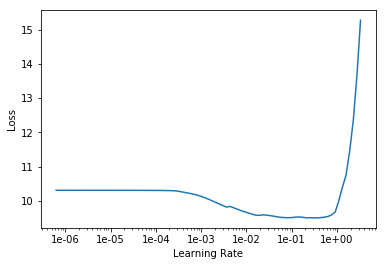

In [0]:
learn.lr_find();
learn.recorder.plot();

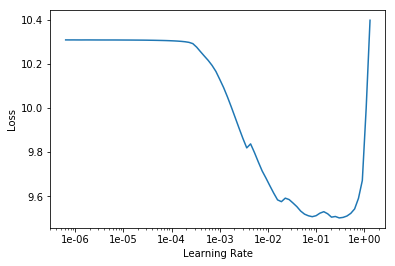

In [0]:
learn.recorder.plot(skip_end=10)

#### epochs

In [0]:
learn.unfreeze()
learn.load('wiki_subword_lm');

epoch,train_loss,valid_loss,accuracy,time
0,5.422485,5.266928,0.226813,36:55


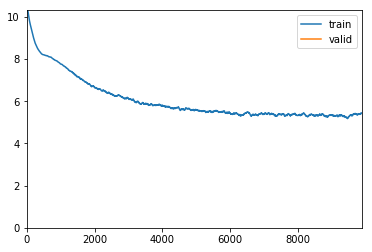

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #1

epoch,train_loss,valid_loss,accuracy,time
0,5.009469,4.958648,0.247136,36:55


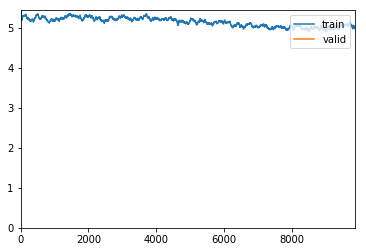

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #2

epoch,train_loss,valid_loss,accuracy,time
0,4.797198,4.808185,0.258401,36:54


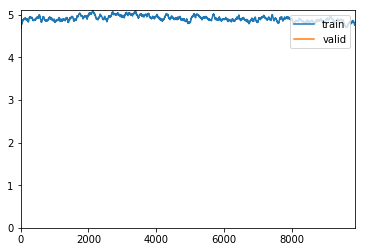

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #3

epoch,train_loss,valid_loss,accuracy,time
0,4.718044,4.713139,0.266196,36:54


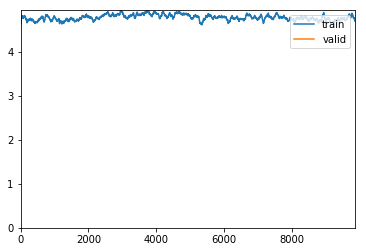

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #4

epoch,train_loss,valid_loss,accuracy,time
0,4.755295,4.646197,0.272124,36:57


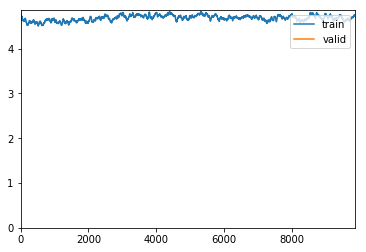

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #5

epoch,train_loss,valid_loss,accuracy,time
0,4.573012,4.594108,0.276887,36:56


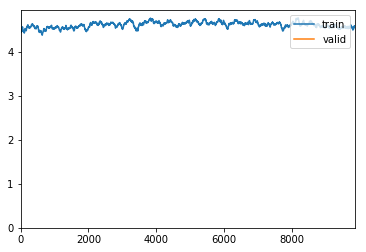

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #6

epoch,train_loss,valid_loss,accuracy,time
0,4.372497,4.491876,0.286046,1:12:29


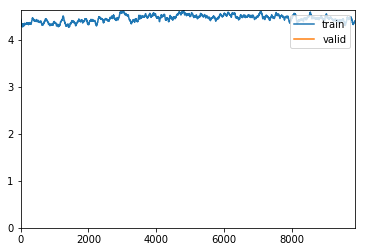

In [0]:
learn.load('wiki_subword_lm')
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #7

epoch,train_loss,valid_loss,accuracy,time
0,4.412295,4.469542,0.288070,1:12:30


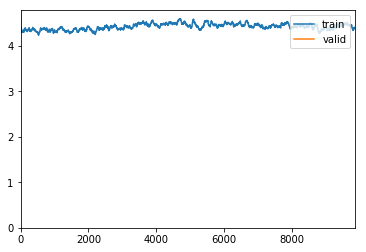

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #8

epoch,train_loss,valid_loss,accuracy,time
0,4.345984,4.453971,0.289828,1:13:13


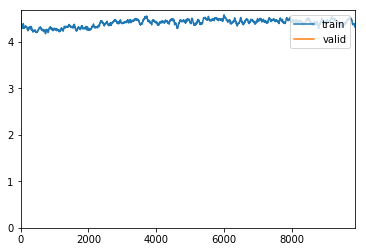

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #9

epoch,train_loss,valid_loss,accuracy,time
0,4.344831,4.437490,0.291395,1:13:14


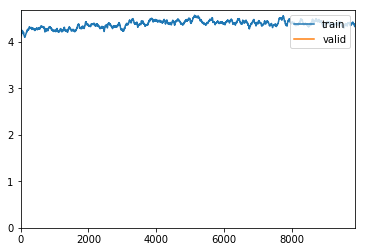

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm') #10

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_11') #11

epoch,train_loss,valid_loss,accuracy,time
0,4.360184,4.421721,0.292712,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_12') #12

epoch,train_loss,valid_loss,accuracy,time
0,4.351522,4.409990,0.293829,37:39


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_13') #13

epoch,train_loss,valid_loss,accuracy,time
0,4.285140,4.399959,0.294825,37:34


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_14') #14

epoch,train_loss,valid_loss,accuracy,time
0,4.371293,4.390086,0.295618,37:41


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_15') #15

epoch,train_loss,valid_loss,accuracy,time
0,4.279755,4.381203,0.296514,37:35


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_16') #16

epoch,train_loss,valid_loss,accuracy,time
0,4.349733,4.373093,0.297426,37:40


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_17') #17

epoch,train_loss,valid_loss,accuracy,time
0,4.255338,4.364986,0.298260,37:34


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_18') #18

epoch,train_loss,valid_loss,accuracy,time
0,4.304943,4.359513,0.298878,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_19') #19

epoch,train_loss,valid_loss,accuracy,time
0,4.240803,4.353324,0.299451,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_20') #20

epoch,train_loss,valid_loss,accuracy,time
0,4.150599,4.348448,0.299891,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_21') #21

epoch,train_loss,valid_loss,accuracy,time
0,4.250115,4.343157,0.300354,37:30


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_22') #22

epoch,train_loss,valid_loss,accuracy,time
0,4.190729,4.338458,0.300808,37:40


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_23') #23

epoch,train_loss,valid_loss,accuracy,time
0,4.157098,4.333094,0.301408,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_24') #24

epoch,train_loss,valid_loss,accuracy,time
0,4.199016,4.328155,0.301671,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_25') #25

epoch,train_loss,valid_loss,accuracy,time
0,4.290332,4.323856,0.302022,37:31


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_26') #26

epoch,train_loss,valid_loss,accuracy,time
0,4.213830,4.321335,0.302423,37:36


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_27') #27

epoch,train_loss,valid_loss,accuracy,time
0,4.237769,4.317090,0.302791,37:29


In [19]:
learn.load('wiki_subword_lm_27') #27
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_28') #28

epoch,train_loss,valid_loss,accuracy,time
0,4.175380,4.314404,0.302945,37:55


In [20]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_29') #29

epoch,train_loss,valid_loss,accuracy,time
0,4.183342,4.312265,0.303178,37:59


In [21]:
learn.fit_one_cycle(1, 1e-3)
learn.save('wiki_subword_lm_30') #30

epoch,train_loss,valid_loss,accuracy,time
0,4.075247,4.306763,0.303554,37:58


#### test

In [0]:
TEXT ='তিনি' #তিনি মারা গেছেন মাস তিনেক
N_WORDS = 100
N_SENTENCES = 5
for _ in range(N_SENTENCES):
  s = learn.predict(TEXT, N_WORDS, temperature=0.75)
  ret = TEXT
  for i in range(len(TEXT)+1,len(s)):
    if(s[i-1]==' '):
      ret += s[i]
  print(ret)

তিনি▁নরীা▁▁।▁▁▁▁▁।▁▁▁▁মডপ"▁"T▁Ge")▁▁▁।▁▁▁রক-এ"▁▁আজ"-এ▁▁▁▁▁▁▁,▁▁▁ে▁▁▁▁▁।▁▁▁▁জ▁▁▁ধ▁।▁▁আশ"▁"Ad")-এ▁▁▁।▁▁বSa
তিনি,▁▁▁▁▁▁▁▁▁▁▁,▁,▁,▁,▁,▁▁▁▁▁▁▁।▁▁,▁,▁,▁,▁▁▁▁▁▁▁।▁▁▁▁▁▁▁।▁bs▁ভবস▁▁▁▁▁র▁▁▁▁▁▁▁।▁▁.▁▁▁▁▁▁▁।▁▁▁▁▁▁▁▁৪▁▁৮৩▁
তিনি▁▁▁▁।▁▁▁▁,▁,▁,▁▁,▁,▁,▁,▁,▁▁daju▁ক▁4▁ত",▁Yim",▁সল",▁kt"▁▁b"▁▁▁▁ে▁▁▁।▁▁▁▁▁▁▁লগ▁▁▁,▁▁▁,এ▁u(ক)▁▁▁▁▁।▁▁mক
তিনি▁▁▁▁▁।▁bs▁র▁্ক▁▁▁▁-পি▁টপনর▁▁▁ী▁।▁▁nm▁▁,▁,▁,▁▁মলড▁▁।▁র▁্ল▁▁▁দ▁▁রক▁শ▁▁মস▁▁।▁থরদ▁গ▁▁স,▁টগ,▁লিবল▁▁▁টন।▁ল
তিনি▁▁▁▁▁▁ত।▁▁▁▁▁▁▁▁▁▁▁র▁▁▁▁।▁▁▁দ▁ট"▁▁▁▁▁▁।▁▁▁দ▁কট▁ক"▁▁দ▁"▁▁▁।▁-এ▁▁▁দ▁ভভ",▁দ▁ল▁▁▁"▁▁দ▁ন▁▁▁"▁▁▁।▁▁▁▁▁▁।▁া


## Utils

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  
  return final_preds,targets

## BAAD6 Dataset

### LM Tuning

In [0]:
data_lm_AA = TextLMDataBunch.from_csv(aa2, 'ulm_train.csv', bs=bs , bptt=bptt,tokenizer=mycust_tok, vocab=sp_vocab)
data_lm_AA.save('bhai_AA_subword_wiki_lm.pkl')

In [23]:
data_lm_AA.show_batch()

idx,text
0,"▁ গত ▁একবছর ▁ধরে ▁কোনো ▁এক ▁দিন ▁পালন ▁করতে ▁পারতো । ▁নির্বাচন ের ▁পরপরই ▁এটা ▁হওয়া ▁উচিত ▁ছিল । ▁কিন্তু ▁তারা তো ▁তখন ▁আন্দোলন ▁করেনি । ▁দেশে ▁বিদেশে ▁যখন ▁সরকারের ▁সাফল্য ▁চরম ে , ▁কূটনৈতিক ভাবে ▁সরকার ▁সফল , ▁ঠিক ▁তখনই ▁বিএনপি ▁জামাত ▁অস্থিরতা ▁তৈরির ▁ফাঁদ ▁পাত ল । ▁সাধারণ ▁মানুষকে ▁জিম্মি ▁করে ▁সরকারের ▁চাপ ▁দেওয়ার ▁মতো ▁একটি ▁ভুল ▁কৌশলে ▁পা ▁দিল । ▁ গত ▁এক ▁বছর ▁ধরেই ▁বিভিন্ন ▁পত্র"
1,"▁কিছু ▁গুপ্ত ঘ ন্টি ▁বাজানোর ▁ব্যবস্থা ▁রয়েছে । ▁অদৃশ্য ▁রশ্মি তে ▁পা ▁বাঁধ লেই ▁সেই ▁পাগলা ▁ঘন ্টি ▁বেজ ে ▁উঠবে , ▁আর ▁দান ো টা ▁টেলি ভী ষণ ▁দেখা ▁ফেলে ▁উঠে ▁এসে ▁আলু র ▁বদলে ▁তাকেই ▁পুড়িয়ে ▁জল যোগ ▁করবে । ▁তিনি ▁পকেট ▁থেকে ▁একটা ▁প্যাকেট ▁বের ▁করে ▁মাসুদ ্রা নার ▁মশলা ▁বার ▁করে ▁বাতাসে ▁ছড়িয়ে ▁দিলেন । ▁এই ▁মশলা য় ▁কোনো ▁গন্ধ ▁নেই , ▁শুধু ▁বাতাসে ▁ছড়িয়ে ▁দিলে"
2,"▁হয়েছেন ▁বহু ▁লোক । ▁আজ ▁বাংলাদেশ ▁সময় ▁দুপুর ▁১২ টা ▁১১ ▁মিনিট ▁২৭ ▁সেকেন্ডে ▁এ ▁ভূমিকম্প ▁অনুভূত ▁হয় । ▁ভূমিকম্পের ▁উৎপত্তিস্থল ▁ঢাকা ▁থেকে ▁৭৪ ৫ ▁কিলোমিটার ▁দূরে , ▁নেপালের ▁রাজধানী ▁কাঠমান্ডু ▁ও ▁ পো খার ার ▁মাঝখানে ▁ লাম জু ং ▁এলাকায় ▁ছিল ▁ ভুমি কম্প টির ▁উৎপত্তিস্থল , ▁এবং ▁রিখটার ▁স্কেলে ▁এর ▁মাত্রা ▁ছিল ▁৭ . ৯ । ▁নেপাল ▁ছাড়াও ▁সমগ্র ▁উত্তর ▁ভারত , ▁পাকিস্তান ▁ও ▁বাংলাদেশ ▁জুড়ে ▁এই"
3,"' জন ▁লোক ▁আগে ▁ভাগে ▁টের ▁পায় । ▁তারা ▁কারা ? ▁আত িফ ▁ব্যাচেলর । ▁থাকেন ▁এক ▁ছাদ ের ▁চিল ে কোঠা য় । ▁সঙ্গে ▁থাকে ▁একমাত্র ▁প্রায় াত ▁বোনের ▁নয় ▁দশ ▁বছরের ▁শিশু ▁কন্যা ▁রূপকথা । ▁যার ▁বাবা ও ▁খুন ▁হয় ▁এক ▁রহস্যময় ▁নৌকা ▁ ডুবি তে । ▁রূপকথা ▁যাকে ▁কিনা ▁তার ▁মামা ▁আত িফ ▁ আরমান ▁ওরফে ▁ভাড়াটে ▁খুনি ▁কথা ▁নামে ▁ডাকে , ▁সে ▁ওই টুকু ▁পি চ্চি"
4,"▁দুধ ▁ কুড়া তে ▁গিয়ে ▁সে ▁ভগবান ▁শিবের ▁সেই ▁ছদ্ম বেশী ▁ মৃগ ের ▁সিং ▁খুঁজে ▁পায় । ▁তখন ▁থেকেই ▁এখানে ▁গ্রামবাসী ▁মিলে ▁ভগবান ▁পশু পতি নাথের ▁নামে ▁এখানে ▁একটি ▁মন্দির ▁প্রতিষ্ঠা ▁করেন । আরেকটি ▁জনপ্রিয় ▁জনশ্রুতি ▁হল , ▁ভগবান ▁শিব ▁আর ▁দেবী ▁প্রভাতী ▁কাঠ মুন্ড ু ▁ ভ্যাল ীতে ▁বেড়াতে ▁এসেছিলেন । ▁তারা ▁বাগ মতী ▁নদীতে ▁স্নান ▁করার ▁সময় ▁ওপারে র ▁জঙ্গল ের ▁সৌন্দর্য ▁দেখে ▁ভগবান ▁শিব ▁আ প্লুত"


In [0]:
data_lm_AA=load_data(aa2,'bhai_AA_subword_wiki_lm.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki/'models'/'wiki_subword_lm_30');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


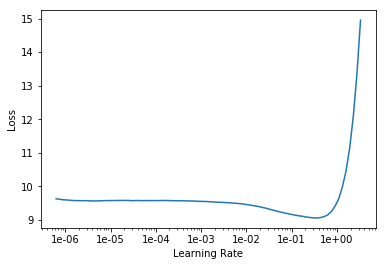

In [28]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

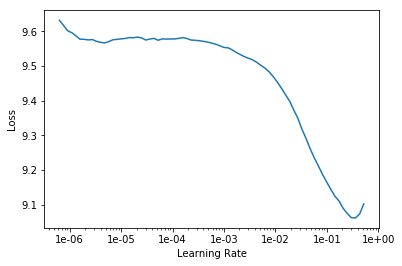

In [29]:
learn.recorder.plot(skip_end=15)

In [30]:
learn.fit_one_cycle(2, 2e-2)
learn.save('bhai_AA_lm_wiki_subword_head');

epoch,train_loss,valid_loss,accuracy,time
0,6.377289,6.438696,0.130913,03:35
1,5.735713,5.930586,0.163125,03:35


In [32]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, 2e-2)
learn.freeze_to(-3)
learn.fit_one_cycle(2, 2e-2)
learn.unfreeze()
learn.fit_one_cycle(4, 2e-2)
learn.save('bhai_AA_lm_wiki_subword_body')

epoch,train_loss,valid_loss,accuracy,time
0,5.905792,6.079459,0.150694,03:40
1,5.516206,5.727907,0.177403,03:39


epoch,train_loss,valid_loss,accuracy,time
0,5.901317,6.067568,0.150988,03:57
1,5.510177,5.706888,0.179256,03:57


epoch,train_loss,valid_loss,accuracy,time
0,5.661733,6.057470,0.149062,04:06
1,5.738271,5.946236,0.156972,04:06
2,5.408672,5.665642,0.177932,04:06
3,4.937543,5.564147,0.189668,04:06


In [0]:
learn.save_encoder('bhai_AA_lm_wiki_subword_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(aa2, 'ulm_train.csv',tokenizer=mycust_tok, vocab=sp_vocab, bs=bs)
data_clas.save('bhai_AA_subword_wiki_clas.pkl')

In [35]:
data_clas.show_batch()

text,target
"▁xx bo s ▁দেখি তে ▁ গিয়া ছি ▁পর্বতমালা ▁একটু ▁বড় ▁... ▁লেখা টা ▁২০০৪ ▁সালের ▁অক্টোবরে ▁লেখা । ▁বছর দু য়ে ক ▁আগে ▁একাধিকবার ▁অনলাইনে ▁প্রকাশিত । ▁এই ▁লেখা টা ▁একাধিক ▁কারণে ▁আমার ▁প্রিয় । ▁প্রথমত , ▁লেখা টা ▁প্রায় ▁এক ▁আসনে ▁লেখা , ▁মাঝখানে ▁শুধু ▁ঘুমিয়ে ছিলাম ▁একটু । ▁দ্বিতীয়ত , ▁এখন ▁পর্যন্ত ▁এটাই ▁আমার ▁ম্যাগ নাম ▁ও পাস ▁( আয়তন ের ▁দিক ▁থেকে ) । ▁তৃতীয় ত",hm
"▁xx bo s ▁দেখি তে ▁ গিয়া ছি ▁পর্বতমালা ▁একটু ▁বড় ▁... ▁লেখা টা ▁২০০৪ ▁সালের ▁অক্টোবরে ▁লেখা । ▁বছর দু য়ে ক ▁আগে ▁একাধিকবার ▁অনলাইনে ▁প্রকাশিত । ▁এই ▁লেখা টা ▁একাধিক ▁কারণে ▁আমার ▁প্রিয় । ▁প্রথমত , ▁লেখা টা ▁প্রায় ▁এক ▁আসনে ▁লেখা , ▁মাঝখানে ▁শুধু ▁ঘুমিয়ে ছিলাম ▁একটু । ▁দ্বিতীয়ত , ▁এখন ▁পর্যন্ত ▁এটাই ▁আমার ▁ম্যাগ নাম ▁ও পাস ▁( আয়তন ের ▁দিক ▁থেকে ) । ▁তৃতীয় ত",hm
"▁xx bo s ▁চাহিদা পত্র ▁১ . ▁ মক বুল ▁স্ক্রিন ▁থেকে ▁চোখ ▁সরিয়ে ▁পর্যবেক্ষণ ▁ডেস্ক ▁থেকে ▁উঠে ▁পড়ল ো । ▁তার ▁মাথা ▁ টিপ টিপ ▁করে ▁ ব ▁ ্য থা ▁করছে , ▁শরীরের ▁কোষগুলো ▁একটু ▁পর ▁পর ▁যেন ▁ বিড় বিড় ▁করে ▁বলছে , ▁এক ▁কাপ ▁কফি ▁খাওয়া ▁দরকার । ▁নভো তরী ▁"" টি ম্বা ক টু "" ▁একটা ▁ছোটো ▁স্কাউট শিপ , ▁সর্বোচ্চ ▁চারজন ▁নভো না বিক",hm
"▁xx bo s ▁আ বাহন ▁১ . ▁"" উনি ▁একজন ▁বু জ রুক ▁ছিলেন । "" ▁শামীম ের ▁কণ্ঠস্বর ে ▁তা চ্ছিল ্যের ▁কোনো ▁কম তি ▁ র ই লো ▁না । ▁সোমা ▁একটু ▁শাসন ▁করার ▁চেষ্টা ▁করলো ▁স্বামী কে , ▁"" নিজ ের ▁দাদা কে ▁কেউ ▁বু জ রুক ▁বলে ▁এভাবে ? "" ▁শামীম ▁বারান্দা র ▁কাঠের ▁রেল ি ঙে ▁পা ▁তুলে ▁দিয়ে ▁আয় েশ ▁করে ▁ চায়ের ▁কাপে",hm
"▁xx bo s ▁গোয়েন্দা ▁ ঝা কানা কা ▁ও ▁অজ্ঞান ▁পার্টি ▁রহস্য ▁এক ▁গোয়েন্দা ▁ ঝা কানা কা ▁চোখ ▁গরম ▁করে ▁বললেন , ▁"" এ বার ও ▁কি ▁সেবার ের ▁মতো ▁দুই ▁ লম্ব রি ▁কেস ▁নিয়ে ▁হাজির ▁হলেন ▁নাকি ? "" ▁পুলিশের ▁গোয়েন্দা ▁বিভাগের ▁ডাক সাইট ে ▁দারোগা ▁কিং ক র্ত ব্য বি মূ ঢ় ▁চৌ ধার ি ▁আধ ▁হাত ▁জি ভ ▁কেটে ▁বললেন , ▁"" আর ▁লজ্জা ▁দেবেন",hm


In [0]:
data_clas=load_data(aa2,'bhai_AA_subword_wiki_clas.pkl',bs=bs)

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_wiki_subword_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


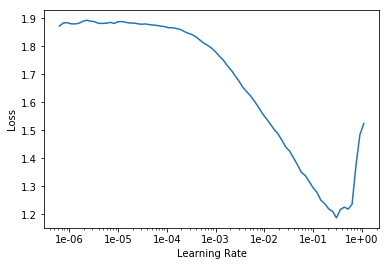

In [38]:
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

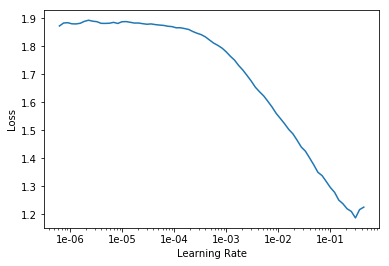

In [39]:
learn_cls.recorder.plot(skip_end=10)

In [40]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('bhai_wiki_subword_cls')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_subword_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_subword_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_subword_cls_4') 

epoch,train_loss,valid_loss,accuracy,time
0,0.770532,0.345203,0.927978,01:52
1,0.446829,0.167504,0.952909,01:52


epoch,train_loss,valid_loss,accuracy,time
0,0.319471,0.228133,0.936288,01:57
1,0.226566,0.156615,0.950139,02:08


epoch,train_loss,valid_loss,accuracy,time
0,0.171769,0.170715,0.955679,02:32
1,0.142452,0.171551,0.958449,02:30


epoch,train_loss,valid_loss,accuracy,time
0,0.092083,0.170938,0.958449,02:55
1,0.082727,0.159665,0.955679,03:04
2,0.073273,0.160354,0.950139,03:03
3,0.064865,0.159213,0.952909,02:51


In [43]:
preds,targ = testing(aa2/'ulm_test.csv')

300
Accuracy: 
0.9466666666666667
[('rg', 'mk'), ('mk', 'rg'), ('ij', 'rn'), ('rn', 'mk'), ('rn', 'mk'), ('rn', 'mk'), ('mk', 'rn'), ('rg', 'mk'), ('rg', 'ij'), ('hm', 'mk'), ('fe', 'mk'), ('fe', 'mk'), ('fe', 'rn'), ('rn', 'mk'), ('rn', 'mk'), ('rg', 'rn')]


In [44]:
from sklearn.metrics import f1_score
out  = f1_score(targ, preds, average='macro') #'macro' , also == weighted cuz dataset is balanced
out

0.9475674268457773